In [1]:
#importing the needed modules
%matplotlib inline
from __future__ import print_function, division
from scipy import stats
import pandas as pd
import numpy as np
import random
import matplotlib
import thinkstats2
import thinkplot

In [2]:
# reading the file that I chose
player = pd.read_csv('../core/Managers.csv')

In [3]:
# printing the columns that the hypothesis will be done on
winning = player['W'].dropna()
losing = player['L'].dropna()
player[['W','L']]

,W,L
0,20,10
1,19,9
2,10,19
3,5,9
4,2,3
5,16,17
6,21,7
7,4,21
8,1,3
9,12,12


In [4]:
#finding the mean
winningmean=winning.mean()
print ('The winning mean is %2f'%winningmean)

The winning mean is 61.729627


In [5]:
#finding the minimum
winningmin=winning.min()
print ('The winning Minimum is %2f'%winningmin)

The winning Minimum is 0.000000


In [6]:
#finding the maximum
winningmax=winning.max()
print ('The winning Maximum is %2f'%winningmax)

The winning Maximum is 116.000000


In [7]:
#finding the standard deviation
winningdiviation=winning.std()
print ('The winning Standard Deviation is %2f'%winningdiviation)

The winning Standard Deviation is 28.746768


In [8]:
#finding the variance
winningvar=winning.var()
print ('The winning Variance is %2f'%winningvar)

The winning Variance is 826.376659


In [9]:
#finding the mean
losingmean=losing.mean()
print ('The losing mean is %2f'%losingmean)

The losing mean is 61.738068


In [10]:
#finding the minimum
losingmin=losing.min()
print ('The losing Minimum is %2f'%losingmin)

The losing Minimum is 0.000000


In [11]:
#finding the maximum
losingmax=losing.max()
print ('The losing Maximum is %2f'%losingmax)

The losing Maximum is 120.000000


In [12]:
#finding the standard deviation
losingdiviation=losing.std()
print ('The losing Standard Deviation is %2f'%losingdiviation)

The losing Standard Deviation is 26.417168


In [13]:
#finding the variance
losingvar=losing.var()
print ('The losing Variance is %2f'%losingvar)

The losing Variance is 697.866743


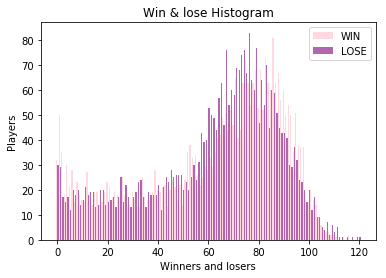

In [14]:
#plotting the histogram
Winning_Histo = thinkstats2.Hist(winning)
thinkplot.Hist(Winning_Histo, color='Pink',align='right',label = 'WIN', width=0.5)

lose_Histo = thinkstats2.Hist(losing)
thinkplot.Hist(lose_Histo, color='purple',align='left',label = 'LOSE',width=0.5) 

thinkplot.Show(xlabel='Winners and losers', ylabel='Players', title='Win & lose Histogram' ,loc='upper right')

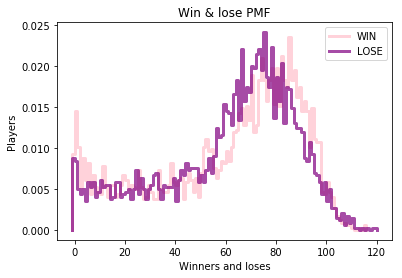

In [15]:
#plotting the pmf

Winning_Pmf = thinkstats2.Pmf(winning)
thinkplot.Pmf(Winning_Pmf, color='pink', label='WIN', align='right')

losing_Pmf = thinkstats2.Pmf(losing)
thinkplot.Pmf(losing_Pmf, color='purple',label='LOSE', align='right') 

thinkplot.PrePlot(2)
thinkplot.Show(xlabel='Winners and loses', ylabel='Players',title='Win & lose PMF',loc='upper right')

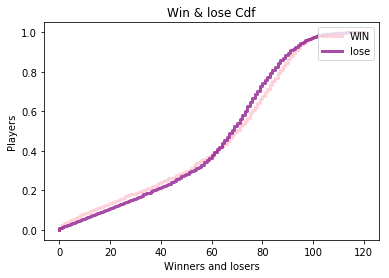

In [16]:
#plotting the cdf

Winning_Cdf = thinkstats2.Cdf(winning)
thinkplot.Cdf(Winning_Cdf,  label='WIN',color='pink')

losing_Cdf = thinkstats2.Cdf(losing)
thinkplot.Cdf(losing_Cdf,label='lose', color='purple')

thinkplot.Show(xlabel='Winners and losers', ylabel='Players',title='Win & lose Cdf',loc='upper right')

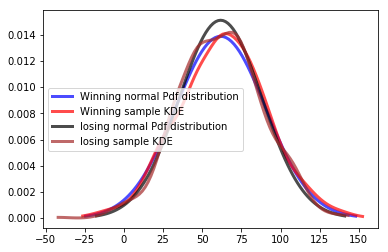

In [17]:
def finding_Median(le):
    the_cdf = thinkstats2.Cdf(le)
    return the_cdf.Value(0.5)

winning_pdf = thinkstats2.NormalPdf(winningmean, winningdiviation)
winning_median = finding_Median(winning_pdf)
winning_Density = winning_pdf.Density(winningmean+ winningdiviation)
thinkplot.Pdf(winning_pdf, label='Winning normal Pdf distribution',color='blue')
winning_sample = np.random.normal(winningmean, winningdiviation, 1000)
winning_sample_pdf = thinkstats2.EstimatedPdf(winning_sample)
thinkplot.Pdf(winning_sample_pdf, label='Winning sample KDE',color='red')

losing_pdf = thinkstats2.NormalPdf(losingmean, losingdiviation)
losing_median = finding_Median(losing_pdf)
losing_Density = losing_pdf.Density(losingmean+ losingdiviation)
thinkplot.Pdf(losing_pdf, label='losing normal Pdf distribution',color='black')
losing_sample = np.random.normal(losingmean, losingdiviation, 1000)
losing_sample_pdf = thinkstats2.EstimatedPdf(losing_sample)

thinkplot.Pdf(losing_sample_pdf, label='losing sample KDE',color='brown')
thinkplot.Show()

In [18]:
#finding the coverance
def Cov(xs, ys, meanx=None, meany=None):
    
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)
    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [19]:
Cov(winning, losing)*100

50226.707355251048

In [20]:
#finding the correlation
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [21]:
Corr(winning, losing)*100

66.158530513495435

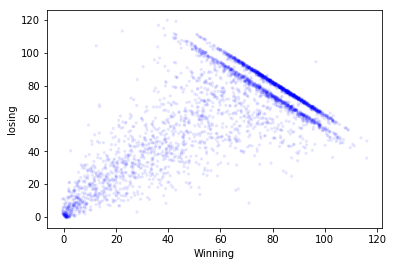

In [22]:
#finding the jitter
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

heights = Jitter(winning, 0.3)
weights = Jitter(losing, 0.3)

thinkplot.Scatter(heights, weights, alpha=0.1, s=10)
thinkplot.Config(xlabel='Winning',
                 ylabel='losing',                 
                 legend=False)

In [23]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

0.994


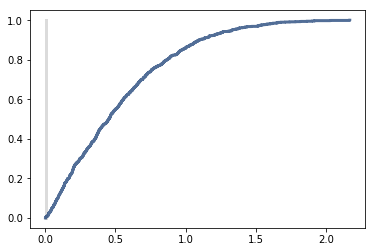

In [24]:
data = winning.values, losing.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
print (pvalue)
ht.PlotCdf()
thinkplot.Show()